# Clusters

In this notebook, we check the cluster output sample

In [1]:
import sys
sys.path.append("/home/s1/jesteves/copa_v2.1/")


In [2]:
from libs.main import copacabana
from libs.make_input_files.make_input_datasets import *

import pandas as pd
from astropy.table import Table, vstack, join
from astropy.io.fits import getdata
import numpy as np
import matplotlib.pyplot as plt

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


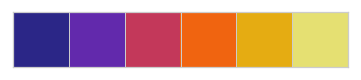

In [3]:
import seaborn as sns; sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.palplot(sns.color_palette("CMRmap"))

In [4]:
## colors
blue = '#2E86C1'
gray = '#A6ACAF'
red = '#A93226'

### Loading Input Catalog

In [7]:
cfg = '../libs/config_copa_dc2.yaml'
copa = copacabana(cfg)

run   ='emuBPZ-rhod-zw'
# run   ='emuBPZ-rhod'
cat   = copa.load_copa_out('cluster',run=run)

mask= np.isnan(cat['Ngals'])
cat = cat[np.logical_not(mask)]

In [8]:
cat.colnames

['CID',
 'Ngals',
 'DA',
 'MU_TRUE_ERR_JK',
 'RAPER',
 'magLim_i',
 'DEC',
 'Norm',
 'redshift',
 'Ngals_true',
 'MU_TRUE',
 'RA',
 'R200',
 'healpix',
 'col0',
 'MASKFRAC',
 'M200_true',
 'mass_bin',
 'MU',
 'R200_true',
 'Nbkg_true',
 'Nbkg',
 'MU_ERR_JK']

In [9]:
zcls  = cat['redshift']
r200  = cat['R200']
nbkg  = cat['Nbkg']

ngals = cat['Ngals']
mu    = cat['MU'] 
muErr = cat['MU_ERR_JK']

nbkgt = cat['Nbkg_true']
ngalst= cat['Ngals_true']
mut   = cat['MU_TRUE']
mutErr= cat['MU_TRUE_ERR_JK']

m200  = cat['M200_true']
r200t = cat['R200_true']

In [10]:
logm  = np.log10(m200)


In [12]:
sys.path.append("/home/s1/jesteves/git/ccopa/notebooks/")
from myplots import *

### Overall Accuracy

In [13]:
w = np.where(ngalst>1)[0]
residual = (ngals[w]/ngalst[w])
mask2    = np.logical_not(np.isnan(residual))&np.logical_not(np.isinf(residual))
mask     = remove_outliers(residual,n=2)&(mask2)

xm      = np.mean(residual[mask])
xstd    = np.std(residual[mask])

print(r'mean: %.3f'%(xm))
print(r'rms : %.3f'%(xstd))

mean: 1.005
rms : 0.184


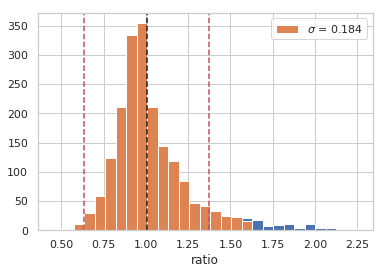

In [14]:
xmin,xmax = 0.45, 2.25
xbins = np.linspace(xmin,xmax,30)
_ = plt.hist(residual,bins=xbins)
_ = plt.hist(residual[mask],bins=xbins,label=r'$\sigma$ = %.3f'%(xstd))
plt.axvline(xm,color='k',ls='--')
plt.axvline(xm+2*xstd,color='r',ls='--')
plt.axvline(xm-2*xstd,color='r',ls='--')

#plt.yscale('log')
plt.xlabel('ratio')
plt.legend()

### Scaling Relations

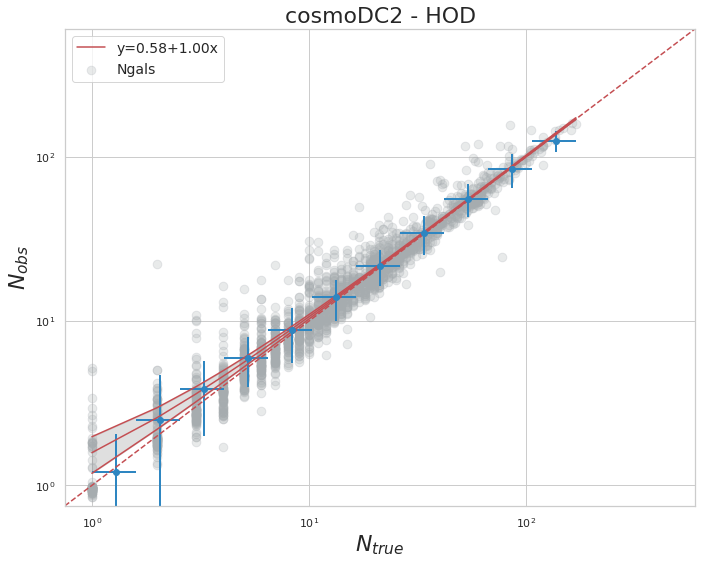

In [15]:
plot_scaling_relation(ngalst,ngals,title='cosmoDC2 - HOD',xlims=(0.75,600),fit=True)

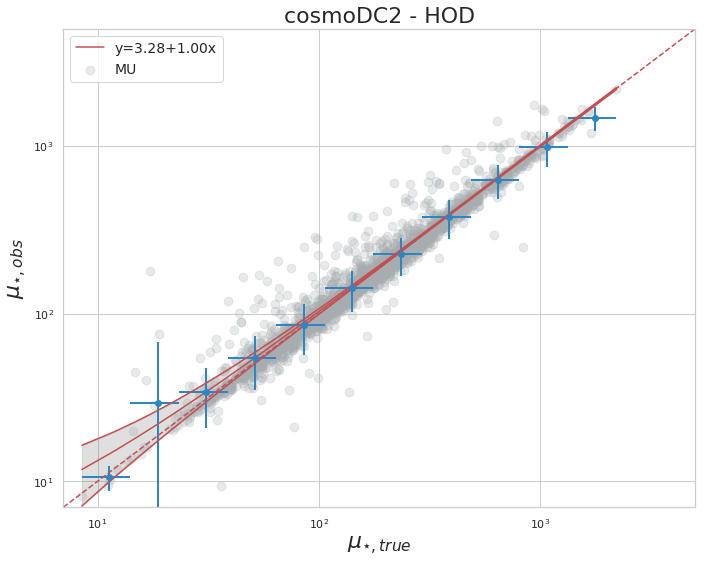

In [16]:
plot_scaling_relation(mut,mu,xl=r'$\mu_{\star,true}$',yl=r'$\mu_{\star,obs}$',title='cosmoDC2 - HOD',xlims=(7,5000),fit=True)

#### Residuals

myplots.py:70: RuntimeWarning: divide by zero encountered in divide
  residual = (1-yvar2/yvar1)


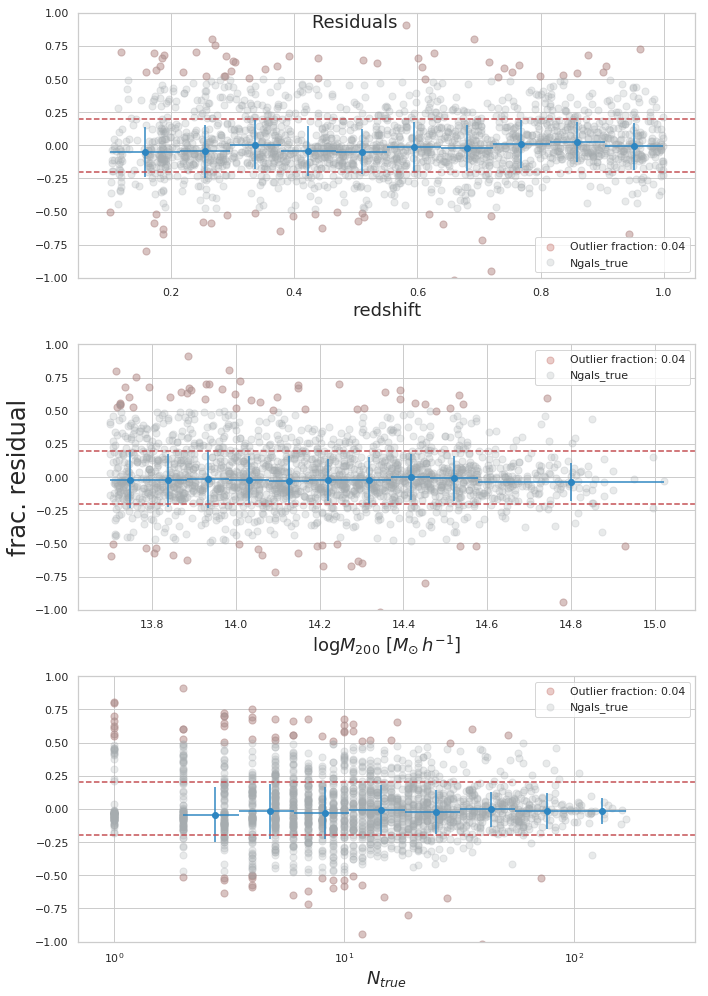

In [17]:
plot_triple_pannel(zcls,ngalst,logm,ngals,ngalst,ymax=1.,save=None)

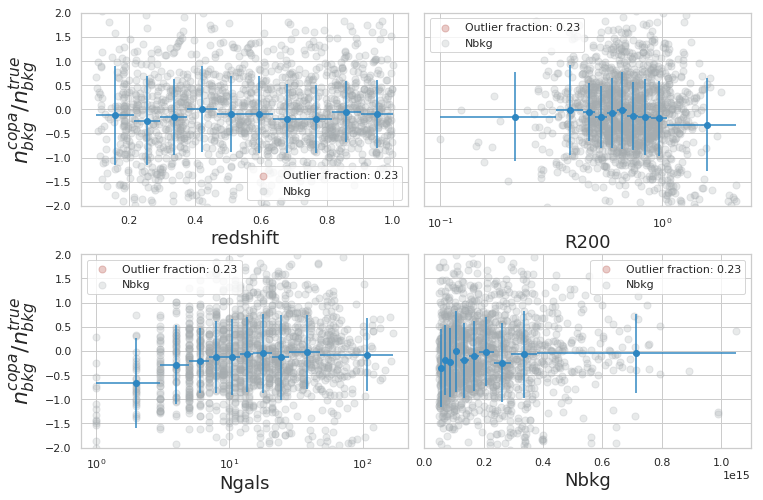

In [19]:
yl = r'$ n_{bkg}^{copa} /n_{bkg}^{true} $'
plot_four_pannel(zcls,r200,ngalst,m200,nbkgt,nbkg,ylabel=yl)

In [50]:
# def plot_four_pannel(zcls,r200,ntrue,nbkg,x1,x2,ylabel='y',ylims=(-2,2)):
#     fig, ax = plt.subplots(2, 2, sharey='all', figsize=(12,8))
#     fig.subplots_adjust(hspace=0.25,wspace=0.05)

#     ax = ax.flatten(order='F')

#     plot_residual(zcls ,x1,x2,ax=ax[0],log=True)
#     plot_residual(r200 ,x1,x2,ax=ax[2],log=True)
#     plot_residual(ntrue,x1,x2,ax=ax[1],log=True)
#     plot_residual(nbkg ,x1,x2,ax=ax[3],log=True)

#     ax[0].set_xlabel('redshift')
#     ax[1].set_xlabel('Ngals')
#     ax[2].set_xlabel('R200')
#     ax[3].set_xlabel('Nbkg')
#     ax[1].set_xscale('log')
#     ax[2].set_xscale('log')
#     ax[0].set_ylim(ylims)
#     ax[0].set_ylabel(ylabel,fontsize=22)
#     ax[1].set_ylabel(ylabel,fontsize=22)
